<a href="https://colab.research.google.com/github/JASADAMAN/Pesonal_project_Data_Science/blob/main/Logistic_Regression_and_Kaggle_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# use api from kaggle to load data set

! pip install -q kaggle


Mount the Google drive so you can store your kaggle API credentials for future use

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.


In [ ]:


! mkdir ~/.kaggle


In [ ]:
! cp /content/drive/MyDrive/API/kaggle.json ~/.kaggle/

In [ ]:


! chmod 600 ~/.kaggle/kaggle.json



In [ ]:
! kaggle datasets list -s 'Titanic - Machine Learning from Disaster' # list datasets matching a search term

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shuofxz/titanic-machine-learning-from-disaster                Titanic: Machine Learning from Disaster            33KB  2017-10-15 10:05:34           4579         67  0.29411766       
rashigoel/titanic-machine-learning-from-disaster              Titanic: Machine Learning from Disaster            34KB  2018-02-10 17:53:45           1023         14  0.29411766       
harunshimanto/titanic-solution-a-beginners-guide              Titanic Solution: A Beginner's Guide               35KB  2018-03-11 14:23:57           1017         13  0.5294118        
azeembootwala/titanic                                         Titanic           

In [ ]:
! kaggle datasets download -d 'rashigoel/titanic-machine-learning-from-disaster'

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 22.7MB/s]


In [ ]:
#! sudo apt-get install unzip
!unzip  titanic-machine-learning-from-disaster.zip -d data/ # unzip file

Archive:  titanic-machine-learning-from-disaster.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
genderdata_raw = pd.read_csv('/content/data/gender_submission.csv')
Testdata_raw = pd.read_csv('/content/data/test.csv')
Traindata_raw = pd.read_csv('/content/data/train.csv')

In [ ]:
genderdata_copy = genderdata_raw
Testdata_copy = Testdata_raw
Traindata_copy = Traindata_raw

In [ ]:
genderdata_copy.head(7)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1


In [ ]:
Testdata_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
Traindata_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
genderdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
Traindata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Testdata_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
Testdata_copy.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
Traindata_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we find in the Test and train data set have missing value must remove missing value

In [ ]:
Traindata_copy_clean = Traindata_copy.dropna()
Testdata_copy_clean = Testdata_copy.dropna()


In [ ]:
Testdata_copy_clean.isnull().sum()
Traindata_copy_clean.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we clear all of null value 


analysis dataset

In [ ]:
Traindata_copy_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
Testdata_copy_clean.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200


 From describe() we get a summary table of statistic of Test and train data we find in coluns name Age , sibSp and parch min and max so far away it can occur outlier then we use quancentile to show a coordinate of data point.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


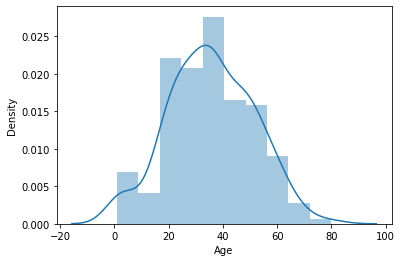

In [ ]:
x1 = Traindata_copy_clean['Age']
x2 = Traindata_copy_clean['SibSp']
x3 = Traindata_copy_clean['Parch']
pltR1 = sns.distplot(x1)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


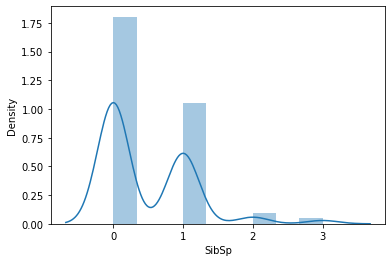

In [ ]:
pltR2 = sns.distplot(x2) # show columns SibSp

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


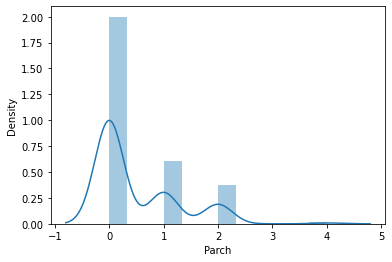

In [ ]:
# show columns Parch
pltR3 = sns.distplot(x3)

 we find age  no outlier that we can not acception

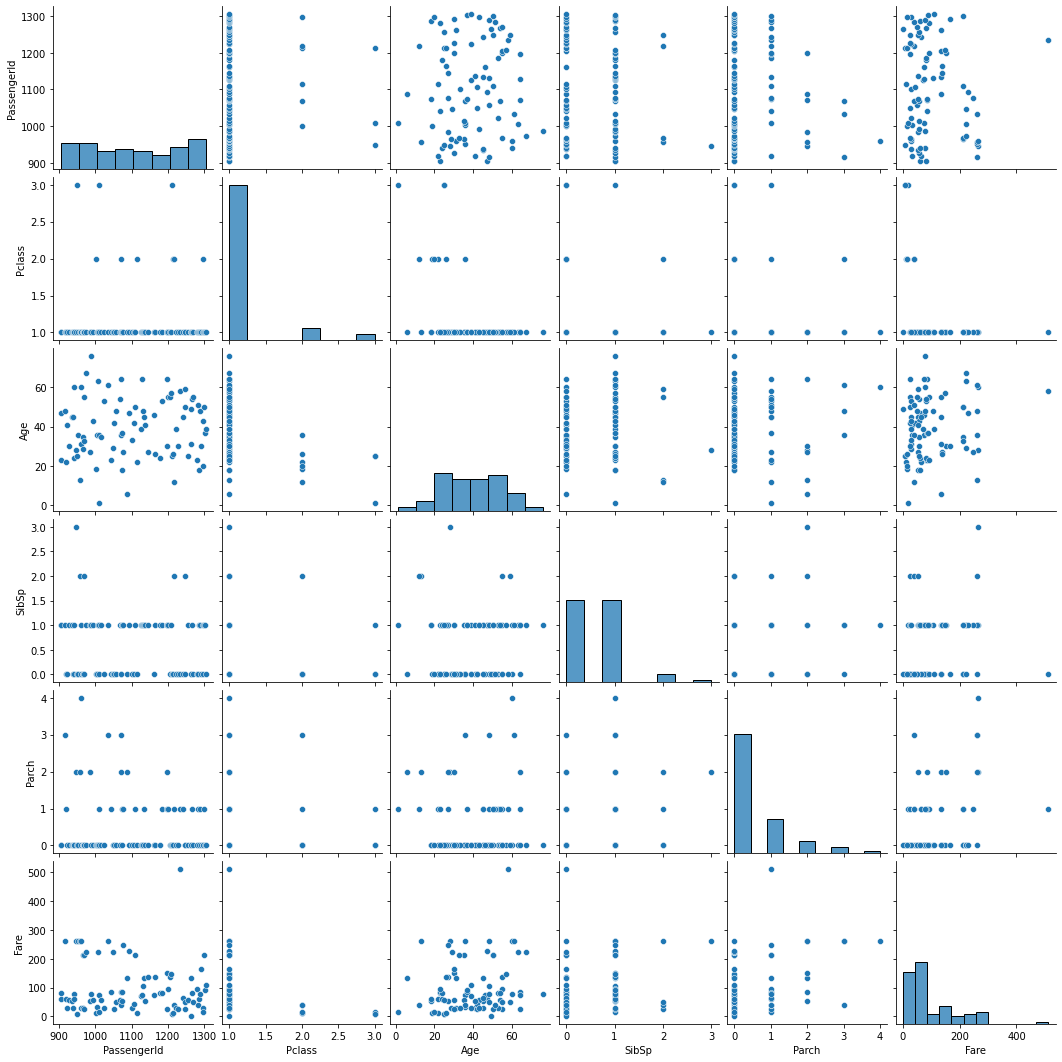

In [ ]:
sns.pairplot(Testdata_copy_clean)

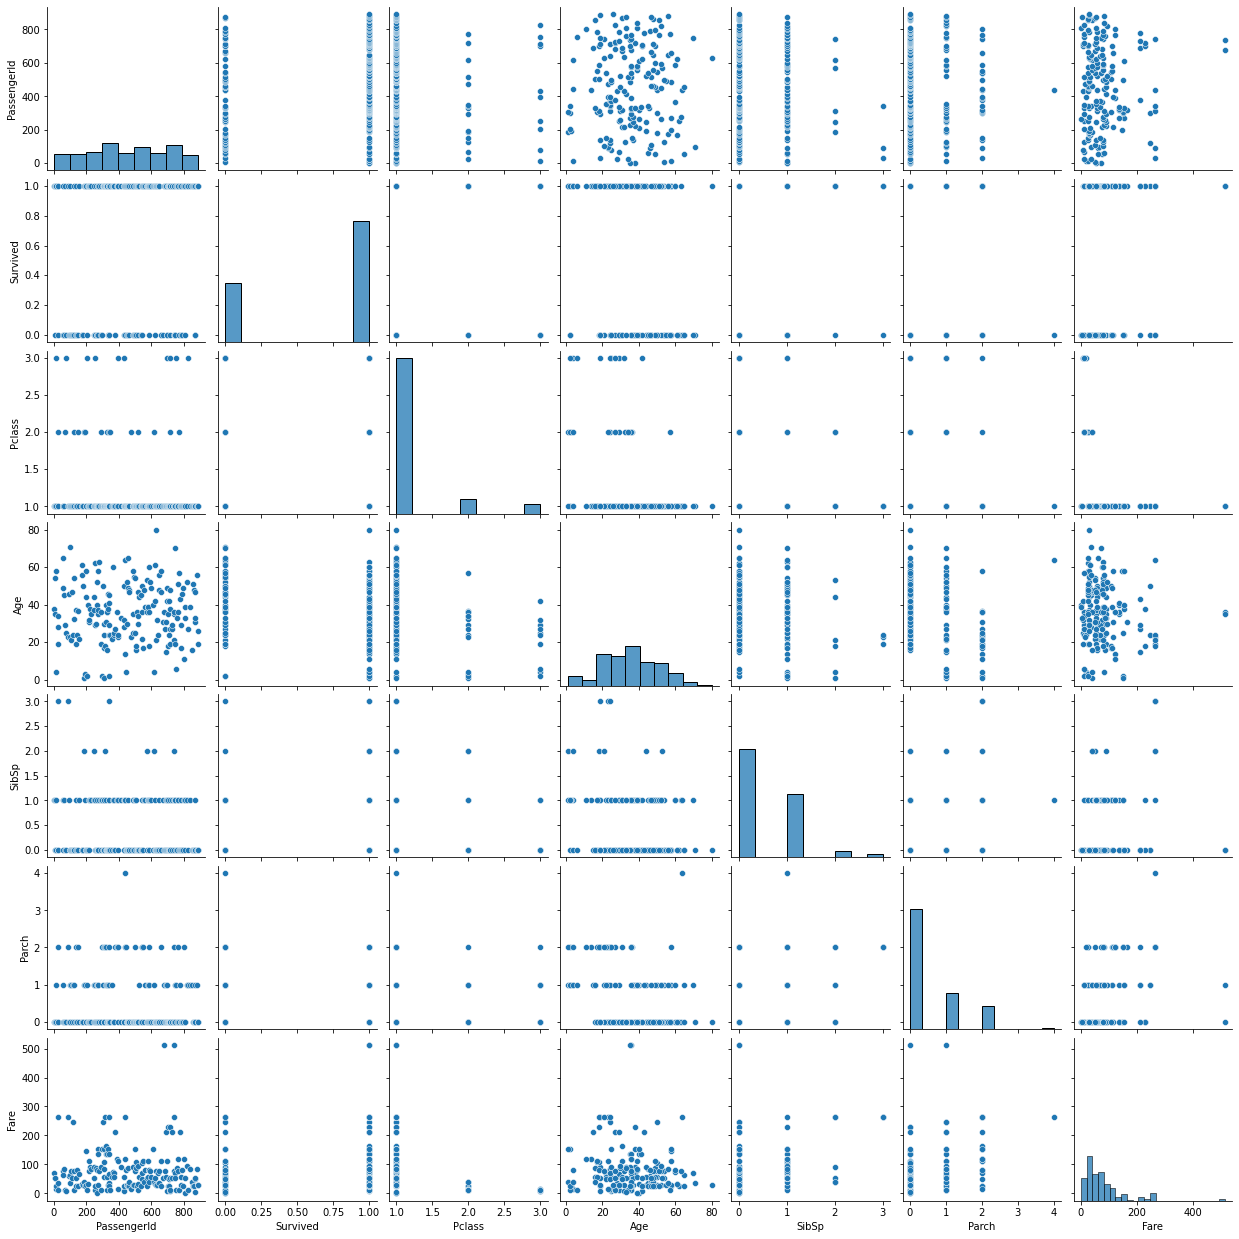

In [ ]:
sns.pairplot(Traindata_copy_clean)

In [ ]:
Traindata_copy_clean['Age'].min()

0.92

In [ ]:
Testdata_copy_clean['Age'].min()

1.0

I don't sure age it  can mean a baby  9 month or 1 years

then I accept it a baby 9 month

---



Dummy 
because the data set some columns not a int type data we use a dummy to change a charecter type to int or flot type

In [ ]:
Traindata_copy_clean.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
Traindata_copy_clean_dummy  = pd.get_dummies(Traindata_copy_clean.drop(['Name', 'Ticket', 'Cabin'], axis=1))  # drop only Name columns
Traindata_copy_clean_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
10,11,1,3,4.0,1,1,16.7000,1,0,0,0,1
11,12,1,1,58.0,0,0,26.5500,1,0,0,0,1


In [ ]:
Traindata_copy_clean_dummy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Train Test Split

In [ ]:
# add varieble
x =  Traindata_copy_clean_dummy.drop('Survived', axis = 1)
y = Traindata_copy_clean_dummy['Survived']

In [ ]:
x.shape


(183, 11)

In [ ]:
y.shape

(183,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

Scaler phase

In [ ]:


# tranform dataset to scalar to feture scale 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



Create Logistic regrssion

In [ ]:
import statsmodels.api as sm



In [ ]:
log_reg = sm.Logit(y_train,X_train).fit() # we have a problem in singular matrix 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.400540
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  146
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.3254
Time:                        05:14:43   Log-Likelihood:                -58.479
converged:                       True   LL-Null:                       -86.684
Covariance Type:            nonrobust   LLR p-value:                 6.551e-09
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0011      0.001      1.226      0.220      -0.001       0.003
Pclass         -0.3596      0.471     -0.763      0.445      -1.283       0.564
Age            -0.0258      0.016     -1.644      0.100      -0.057       0.005
SibSp           0.6892      0.460      1.497      0.134      -0.213       1.591
Parch          -0.4302      0.347     -1.241      0.215      -1.109       0.249
Fare            0.0010      0.003      0.317      0.751      -0.005       0.007
Sex_female      2.2887   2.12e+07   1.08e-07      1.000   -4.16e+07    4.16e+07
Sex_male       -0.6353   2.12e+07  -2.99e-08      1.000   -4.16e+07    4.16e+07
Embarked_C      1.7266   2.12e+07   8.13e-08      1.000   -4.16e+07    4.16e+07
Embarked_Q     -0.9772   2.12e+07   -4.6e-08      1.000   -4.16e+07    4.16e+07
Embarked_S      0.9039   2.12e+07   4.26e-08      1.000   -4.16e+07    4.16e+07
===============================================================================
"""

In [ ]:


# create function and check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:


def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))



In [ ]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
modelLO = LogisticRegression()
modelLO.fit(X_train, y_train)
y_pred = modelLO.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

evaluate_model_performance(y_test, y_pred)



0.6216216216216216
[[13  6]
 [ 8 10]]


In [ ]:
modelLO.score(X_test, y_pred) # accurenry is 100% 

1.0

In [ ]:
acc_log = round(modelLO.score(X_test, y_pred) * 100, 2)
acc_log

100.0

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.68      0.65        19\n           1       0.62      0.56      0.59        18\n\n    accuracy                           0.62        37\n   macro avg       0.62      0.62      0.62        37\nweighted avg       0.62      0.62      0.62        37\n'

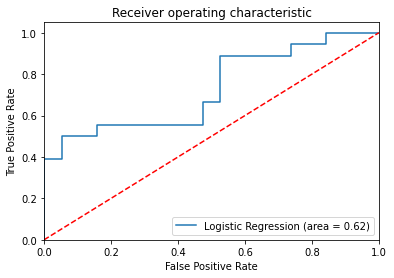

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, modelLO.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, modelLO.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NOt a good model because the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Must to find a way to improve method and want a accurency 85% > up

Test result

In [ ]:
Traindata_copy_clean_dummy.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
871,872,1,1,47.0,1,1,52.5542,1,0,0,0,1
872,873,0,1,33.0,0,0,5.0000,0,1,0,0,1
879,880,1,1,56.0,0,1,83.1583,1,0,1,0,0
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
y_pred_test = modelLO.predict([[888, 	1 ,	19.0, 	0, 	0, 	30.0000, 	1, 	0, 	0, 	0, 	1]])
y_pred_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

predict number 887 is survived in titanic case

SECOUND


In [ ]:
# add varieble
x1 =  Traindata_copy_clean_dummy.drop('Survived', axis = 1)
y2 = Traindata_copy_clean_dummy['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y2, test_size=0.4, random_state=49)

In [ ]:
# tranform dataset to scalar to feture scale 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X1_train)
X_train1_scaled = scaler.transform(X1_train)
X_test1_scaled = scaler.transform(X1_test)




In [ ]:
import statsmodels.api as sm

In [ ]:
log_reg = sm.Logit(y1_train,X_train1_scaled).fit() # we have a problem in singular matrix 
log_reg.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.519577
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  109
Model:                          Logit   Df Residuals:                      100
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.1298
Time:                        05:31:12   Log-Likelihood:                -56.634
converged:                      False   LL-Null:                       -65.080
Covariance Type:            nonrobust   LLR p-value:                   0.03125
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0549      0.244      0.225      0.822      -0.424       0.534
x2            -0.4247      0.300     -1.414      0.157      -1.013       0.164
x3            -0.4208      0.265     -1.591      0.112      -0.939       0.098
x4             0.0538      0.262      0.205      0.838      -0.460       0.568
x5            -0.1785      0.260     -0.687      0.492      -0.688       0.331
x6             0.1767      0.248      0.712      0.476      -0.310       0.663
x7             0.5659   1.28e+07   4.41e-08      1.000   -2.51e+07    2.51e+07
x8            -0.5659   1.28e+07  -4.41e-08      1.000   -2.51e+07    2.51e+07
x9             0.1242   1.04e+07   1.19e-08      1.000   -2.04e+07    2.04e+07
x10           -0.1872   2.87e+06  -6.52e-08      1.000   -5.63e+06    5.63e+06
x11           -0.0720   1.05e+07  -6.86e-09      1.000   -2.06e+07    2.06e+07
==============================================================================
"""

In [ ]:
# create function and check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLOO = LogisticRegression()
modelLOO.fit(X_train1_scaled, y1_train)
y1_pred = modelLOO.predict(X_test1_scaled)

In [ ]:
modelLOO.score(X_test1_scaled, y1_pred)

1.0

In [ ]:
classification_report(y1_test, y1_pred)
# compare y test (TURE) AND Y PREDICT

'              precision    recall  f1-score   support\n\n           0       0.67      0.69      0.68        29\n           1       0.80      0.78      0.79        45\n\n    accuracy                           0.74        74\n   macro avg       0.73      0.73      0.73        74\nweighted avg       0.74      0.74      0.74        74\n'

ValueError: ignored

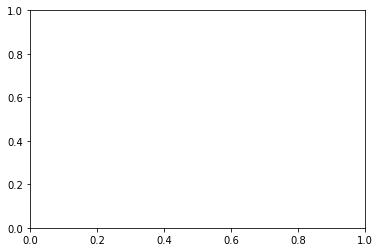

In [ ]:
plt.scatter(X_test1_scaled, y1_pred)
plt.xlabel("Factor")
plt.ylabel("Survival Or Not")

In [ ]:
import seaborn as sns

In [ ]:
0sns.regplot(x=X_test1_scaled, y= y1_pred, data=, logistic=True, ci=None)

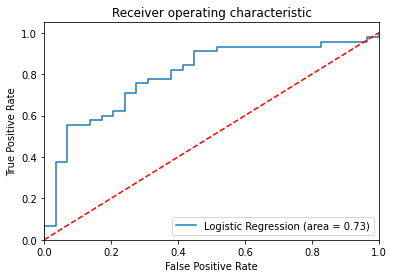

In [ ]:
logit_roc_auc = roc_auc_score(y1_test, modelLOO.predict(X_test1_scaled))
fpr, tpr, thresholds = roc_curve(y1_test, modelLOO.predict_proba(X_test1_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# because feture scaler and add more train splite  the accurency of model is up to  73 %

In [ ]:
# TRY TO PREDICT IN TEST_DATA_COPY

In [ ]:
genderdata_copy.shape

(418, 2)

In [ ]:
Testdata_copy_clean.shape

(87, 11)

In [ ]:
Testdata_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
combine_testdata = pd.concat([Testdata_copy,genderdata_copy], axis=1)
combine_testdata = combine_testdata.loc[:,~combine_testdata.T.duplicated(keep='first')] # remove duplicate columns


In [ ]:
combine_testdata.reset_index() # to fix nan affect
combine_testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
combine_testdata_clean = combine_testdata.dropna()
combine_testdata_clean.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [ ]:
combine_testdata.shape

(418, 12)

In [ ]:
combine_testdata_clean.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,0


In [ ]:
# create dataset to test a "secound" model modelLOO
data_test_clean = combine_testdata_clean.drop(['Name', 'Ticket', 'Cabin'], axis= 1)
data_test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
12,904,1,female,23.0,1,0,82.2667,S,1
14,906,1,female,47.0,1,0,61.1750,S,1
24,916,1,female,48.0,1,3,262.3750,C,1
26,918,1,female,22.0,0,1,61.9792,C,1
28,920,1,male,41.0,0,0,30.5000,S,0


In [ ]:
Traindata_copy_clean_dummy.head() # we must to a sequent of columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,1,0,0,1
10,11,1,3,4.0,1,1,16.7000,1,0,0,0,1
11,12,1,1,58.0,0,0,26.5500,1,0,0,0,1


In [ ]:
data_test_clean_dummy = pd.get_dummies(data_test_clean) 
data_test_clean_dummy.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
12,904,1,23.0,1,0,82.2667,1,1,0,0,0,1
14,906,1,47.0,1,0,61.1750,1,1,0,0,0,1
24,916,1,48.0,1,3,262.3750,1,1,0,1,0,0
26,918,1,22.0,0,1,61.9792,1,1,0,1,0,0
28,920,1,41.0,0,0,30.5000,0,0,1,0,0,1


In [ ]:
# try to predict by LOO model

In [ ]:
X_datatest = data_test_clean_dummy.drop('Survived', axis = 1)
y_datatest =  data_test_clean_dummy['Survived']

In [ ]:

scaler = StandardScaler()
scaler.fit(X_datatest)
X_scaled = scaler.transform(X_datatest)
X_scaled.shape

(87, 11)

In [ ]:
y_pred_datatest = modelLOO.predict(X_scaled)
y_pred_datatest

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
y_datatest.head()

12    1
14    1
24    1
26    1
28    0
Name: Survived, dtype: int64

In [ ]:

reg_summary = pd.DataFrame(y_datatest, columns=['Survived true'])
reg_summary['Survived Predict'] = y_pred_datatest
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
reg_summary # Create a table show coffecient of each a varible

,Survived true,Survived Predict
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,0
...,...,...
82,NaN,1
83,NaN,0
84,NaN,1
85,NaN,1


In [ ]:
reg_summary.reset_index()
reg_summary.head()
# maybe we forget resetindex like y_test = y_test.reset_index(drop=True)

,Survived true,Survived Predict
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,0


In [ ]:
reg_table = pd.DataFrame(data_test_clean_dummy['Survived'])
reg_table.rename(columns={"Survived": "Survived_True"})  # rename
reg_table["Survived_Predict"] = y_pred_datatest
reg_table

,Survived,Survived_Predict
12,1,1
14,1,1
24,1,1
26,1,1
28,0,0
...,...,...
404,0,1
405,0,0
407,0,1
411,1,1


In [ ]:
reg_table['Check_Predict_accurency'] = (reg_table["Survived"] == reg_table["Survived_Predict"] )
reg_table


,Survived,Survived_Predict,Check_Predict_accurency
12,1,1,True
14,1,1,True
24,1,1,True
26,1,1,True
28,0,0,True
...,...,...,...
404,0,1,False
405,0,0,True
407,0,1,False
411,1,1,True


In [ ]:
reg_table

,Survived,Survived_Predict,Check_Predict_accurency
12,1,1,True
14,1,1,True
24,1,1,True
26,1,1,True
28,0,0,True
...,...,...,...
404,0,1,False
405,0,0,True
407,0,1,False
411,1,1,True


In [ ]:
reg_table['Check_Predict_accurency'].describe()

count       87
unique       2
top       True
freq        64
Name: Check_Predict_accurency, dtype: object

In [ ]:
reg_table['Check_Predict_accurency'].nunique()

2

In [ ]:
reg_table['Check_Predict_accurency'].value_counts() # count diffecnt type

True     64
False    23
Name: Check_Predict_accurency, dtype: int64

In [ ]:
(64/87)*100

73.5632183908046

In [ ]:
 # we find if we use modelLOO zccurency be about 73 %

Phase Treee

add the new varible to impove this model
if we dont drop cabin





In [ ]:
Train_clean = Traindata_copy
Train_clean['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
Train_clean['Title'] = Train_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  # clean charecter
Train_clean.head() 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
# manage a name columns
for x in Train_clean:
      x = Train_clean['Title']
      x = x.replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

      x = x.replace('Mlle', 'Miss')
      x = x.replace('Ms', 'Miss')
      x = x.replace('Mme', 'Mrs')

      

In [ ]:
Train_clean['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
  x.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for  x in Train_clean:
      x = Train_clean['Title']
      x= x.map(title_mapping)
      x = x.fillna(0)
x.head()

0    1.0
1    3.0
2    2.0
3    3.0
4    1.0
Name: Title, dtype: float64

In [ ]:
Train_clean['Score_Name'] = x
Train_clean


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Score_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1.0


In [ ]:
Train_cleann = Train_clean.dropna()
Train_cleann.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Score_Name     0
dtype: int64

In [ ]:
Train_dummy  = pd.get_dummies(Train_cleann.drop(['Cabin', 'Ticket','Name', 'Title'], axis=1))  # drop only Name columns
Train_dummy.shape

(183, 13)

Should we add new columns from a columns current data to improve a accerency

In [ ]:
Train_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Score_Name,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,71.2833,3.0,1,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,3.0,1,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,1.0,0,1,0,0,1
10,11,1,3,4.0,1,1,16.7000,2.0,1,0,0,0,1
11,12,1,1,58.0,0,0,26.5500,2.0,1,0,0,0,1


In [ ]:
x3 =  Train_dummy.drop('Survived', axis = 1)
y3 = Train_dummy['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.4, random_state=49)

In [ ]:
# tranform dataset to scalar to feture scale 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X3_train)
X_train3_scaled = scaler.transform(X3_train)
X_test3_scaled = scaler.transform(X3_test)

In [ ]:
import statsmodels.api as sm
regLO3 = sm.Logit(y3_train,X_train3_scaled).fit() # we have a problem in singular matrix 
regLO3.summary()

         Current function value: 0.517047
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  109
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.1340
Time:                        05:31:24   Log-Likelihood:                -56.358
converged:                      False   LL-Null:                       -65.080
Covariance Type:            nonrobust   LLR p-value:                   0.04220
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0526      0.245      0.214      0.830      -0.428       0.533
x2            -0.4511      0.304     -1.485      0.138      -1.047       0.144
x3            -0.4233      0.265     -1.596      0.110      -0.943       0.096
x4             0.0229      0.261      0.088      0.930      -0.489       0.535
x5            -0.2142      0.267     -0.804      0.422      -0.737       0.308
x6             0.1753      0.248      0.707      0.480      -0.311       0.661
x7             0.2289      0.305      0.752      0.452      -0.368       0.826
x8             0.5006        nan        nan        nan         nan         nan
x9            -0.5006        nan        nan        nan         nan         nan
x10            0.1322    5.7e+06   2.32e-08      1.000   -1.12e+07    1.12e+07
x11           -0.1733   1.57e+06   -1.1e-07      1.000   -3.08e+06    3.08e+06
x12           -0.0837   5.75e+06  -1.46e-08      1.000   -1.13e+07    1.13e+07
==============================================================================
"""

In [ ]:
# create function and check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLO3 = LogisticRegression()
modelLO3.fit(X_train3_scaled, y3_train)


LogisticRegression()

In [ ]:
y3_pred = modelLO3.predict(X_test3_scaled)

In [ ]:
classification_report(y3_test, y3_pred)
# compare y test (TURE) AND Y PREDICT

'              precision    recall  f1-score   support\n\n           0       0.69      0.69      0.69        29\n           1       0.80      0.80      0.80        45\n\n    accuracy                           0.76        74\n   macro avg       0.74      0.74      0.74        74\nweighted avg       0.76      0.76      0.76        74\n'

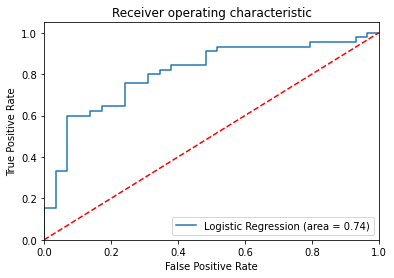

In [ ]:
logit_roc_auc = roc_auc_score(y1_test, modelLO3.predict(X_test3_scaled))
fpr, tpr, thresholds = roc_curve(y1_test, modelLO3.predict_proba(X_test3_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

After add a score name the accerency is up 1%
I think we can use Classification model or add a  class like age gap or cabin (only charecter ) or they are alone or not  by sibbing 

